# Seaborn: barplot

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import bs4 as bs
import requests

import re
import os
import datetime
import random

import warnings
warnings.filterwarnings('ignore')


In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.shape

(344, 7)

## Intro Visuals

In [5]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [6]:
sns.set_style('white')

In [7]:
pen_pal = {'Gentoo': '#2F8F8F',
           'Adelie': '#F79021',
           'Chinstrap': '#A200EF'
          }

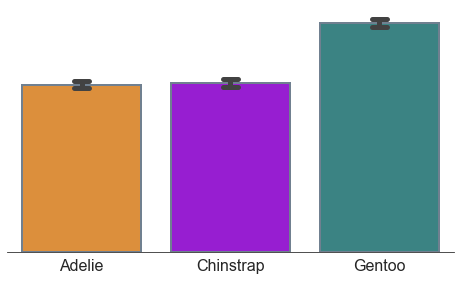

In [10]:
plt.figure(figsize=(8, 4.5))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=95, edgecolor='slategray', linewidth=2)
sns.despine(left=True)
#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=16);

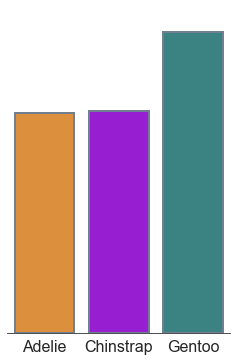

In [11]:
plt.figure(figsize=(4, 6))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=None, edgecolor='slategray', linewidth=2)
sns.despine(left=True)
#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 5500)
plt.yticks([])
plt.xticks(fontsize=16);

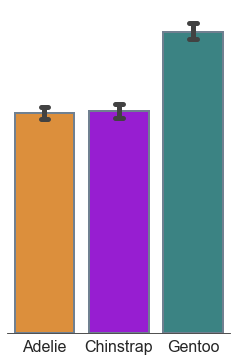

In [12]:
plt.figure(figsize=(4, 6))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=99.5, edgecolor='slategray', linewidth=2)
sns.despine(left=True)
#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 5500)
plt.yticks([])
plt.xticks(fontsize=16);

In [13]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

## Basics

In [14]:
sns.set_style('darkgrid')

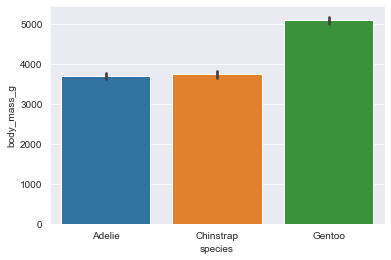

In [15]:
sns.barplot(x='species', y='body_mass_g', data=penguins);

In [16]:
penguins.groupby('species').body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

### Horizontal Barplot

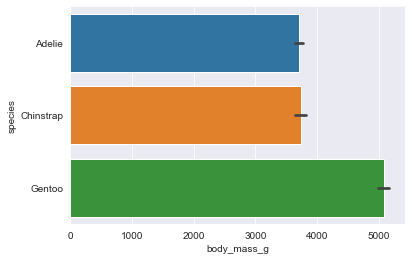

In [17]:
sns.barplot(x='body_mass_g', y='species', data=penguins);

## Interval Estimates


### Confidence Interval (`ci`)

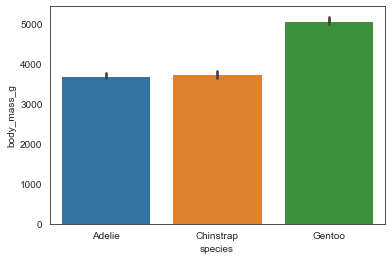

In [43]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            ci=95
           );

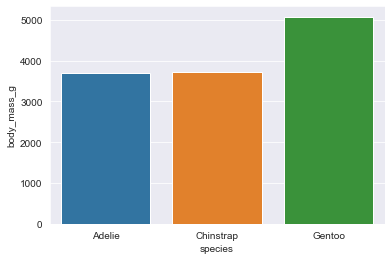

In [19]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            ci=None
           );

## Estimator

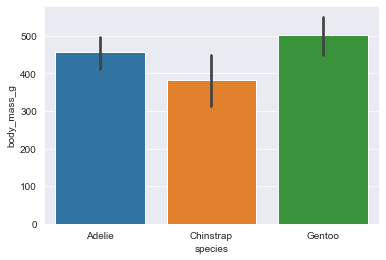

In [20]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            estimator=np.std
           );

In [22]:
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
penguins.groupby('species').body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


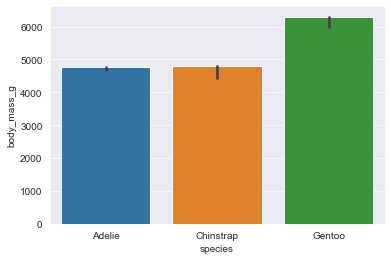

In [23]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            estimator=np.max
           );

## Categorical Variables

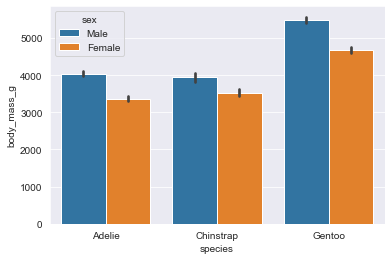

In [24]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            hue='sex'
           );

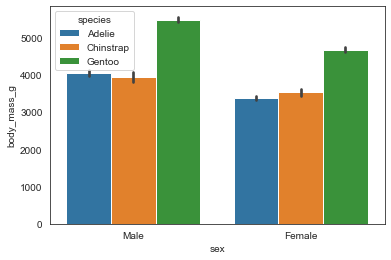

In [46]:
sns.barplot(x='sex', y='body_mass_g', 
            data=penguins,
            hue='species'
           );

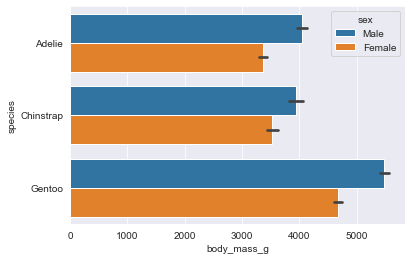

In [25]:
sns.barplot(x='body_mass_g', y='species',  
            data=penguins,
            hue='sex'
           );

### order, hue_order

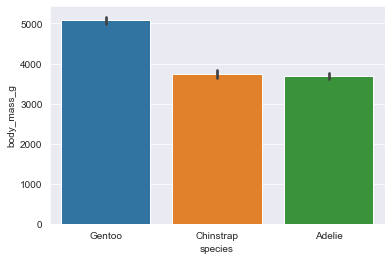

In [26]:
sns.barplot(x='species', y= 'body_mass_g', 
            data=penguins,
            order=['Gentoo', 'Chinstrap', 'Adelie']
           );

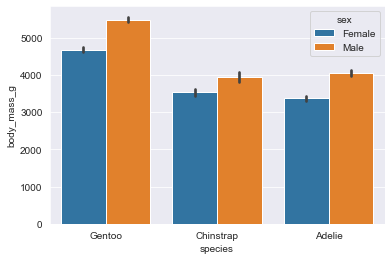

In [27]:
sns.barplot(x='species', y= 'body_mass_g', 
            hue='sex',
            order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue_order=['Female', 'Male'],
            data=penguins
           );

## Styling Colors

In [28]:
sns.set_style('white')


### `color`

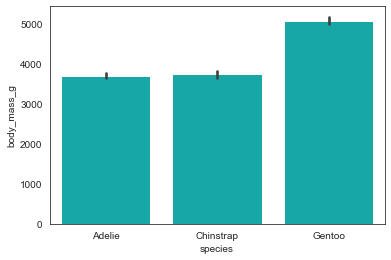

In [29]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins, 
            color='c'
           );

### `errcolor` and `errwidth`

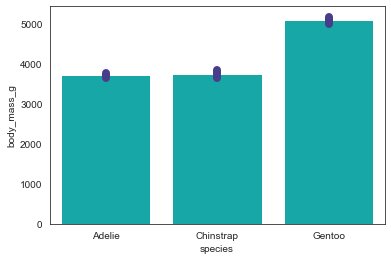

In [32]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            color='c',
            errcolor='darkslateblue', #Error color
            errwidth=8 #Error width
           );

### `palette`

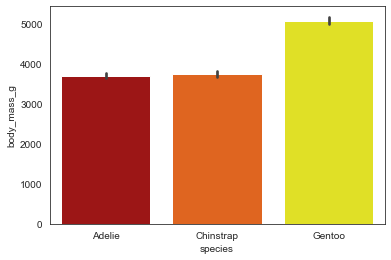

In [33]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            palette='hot'
           );

### `edgecolor` and `linewidth`

The seaborn barplot inherits from matplotlib's `bar`.  Check [the docs](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar) for more options.

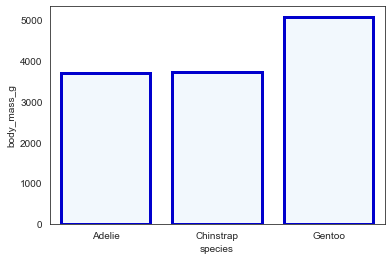

In [34]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=None,
            color='aliceblue',
            edgecolor='mediumblue',
            lw=3
           );

## BONUS: Stacked Barplot

In [36]:
penguins_sample = penguins.dropna().groupby(['species', 'sex']).sample(3, random_state=10)

penguins_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,Female
193,Chinstrap,Dream,46.2,17.5,187.0,3650.0,Female
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,Male


Note: I had to update my version of pandas.  

In [37]:
pd.__version__

'1.3.4'

In [38]:
from matplotlib import pyplot as plt

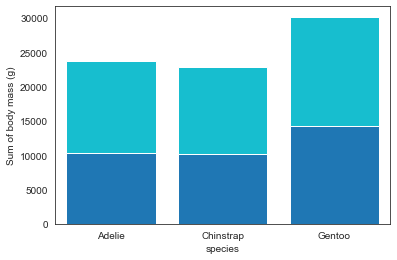

In [39]:
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Female'],
            color='tab:blue',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci=None,
            estimator=np.sum,
            saturation=1
           )
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Male'],
            color='tab:cyan',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci = None,
            estimator = np.sum,
            bottom=(
                penguins_sample[penguins_sample.sex == 'Female']
                .groupby('species')
                .body_mass_g
                .sum()
                ),
            saturation=1
           )

plt.ylabel('Sum of body mass (g)');

Much, much easier to accomplish this with pandas plotting method!  ... And comes with legend already built.

In [40]:
sns.set_style('white')

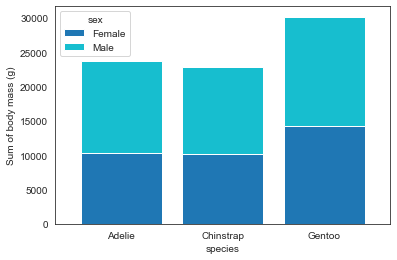

In [42]:
(penguins_sample
    .groupby(['species', 'sex'])
    .body_mass_g
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)

plt.xticks(rotation=0)
plt.ylabel('Sum of body mass (g)');